In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from frbpoppy import unpickle
from frbpoppy.paths import paths

In [2]:
chime_array = np.load(paths.data() + '/models/beams/chime-frb.npy')

# Fig.3

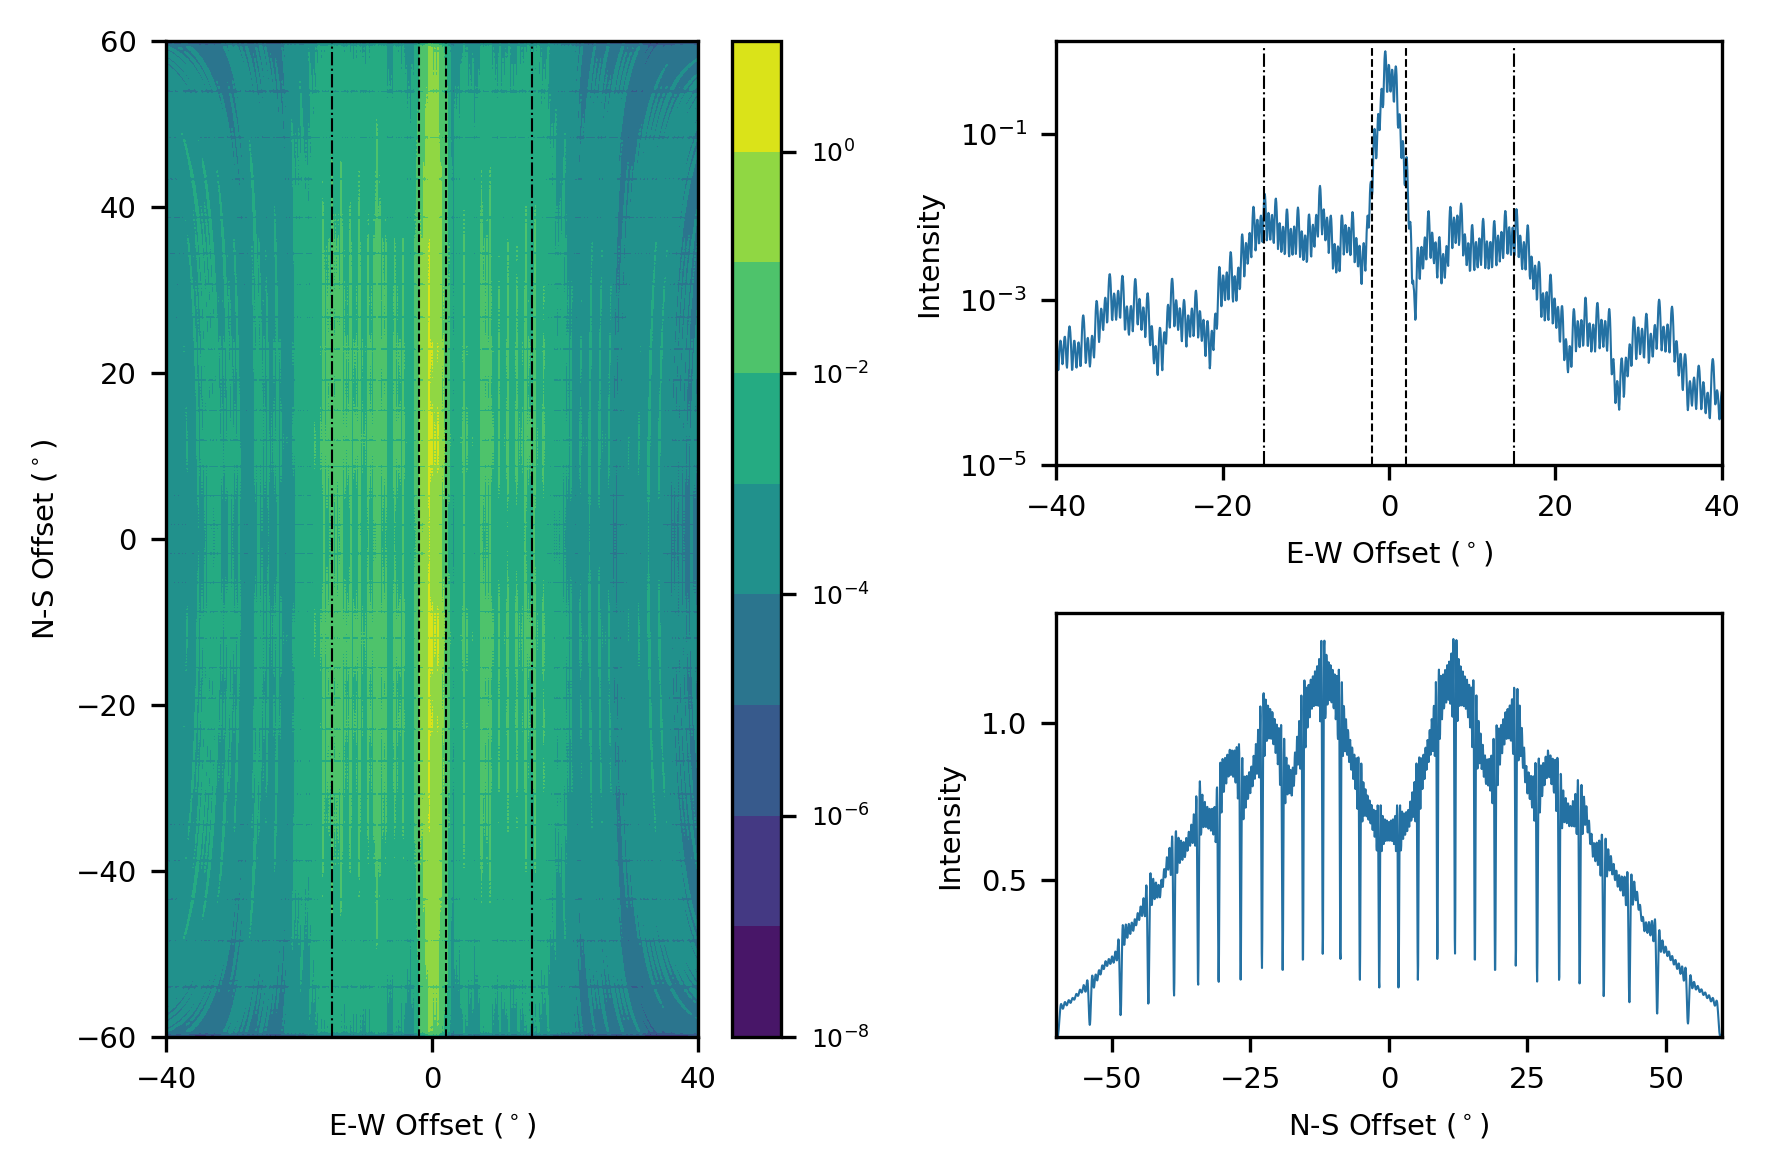

In [109]:
x_c, y_c = np.linspace(-40, 40, 1600), np.linspace(-60, 60, 2400)

fig = plt.figure(dpi=300)
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)

#fig1, (ax1, ax2, ax3) = plt.subplots(2, 2)#plt.subplots(2,2)
#ax1.figure(figsize=(6,10))
cs = ax1.contourf(x_c, y_c, chime_array, locator=ticker.LogLocator())

#circle = plt.Circle((0, -25.2), 0.1, color='r')
#ax1.add_patch(circle)
plt.xlabel('E-W Offset ($^\circ$)', size=7)
plt.ylabel('N-S Offset ($^\circ$)', size=7)
plt.xticks([-40, 0, 40], fontsize=7)
plt.yticks(fontsize=7)
plt.vlines(np.array([-2,2]), ymin=-60, ymax=60, color='black', linestyle='dashed', linewidth=0.5)
plt.vlines(np.array([-15,15]), ymin=-60, ymax=60, color='black', linestyle='-.', linewidth=0.5)
#plt.contourf(x_c, y_c, np.log10(chime_array), levels=20)
#plt.clabel()
cbar = fig.colorbar(cs)
cbar.ax.tick_params(labelsize=6)
cbar.ax.set_yscale('log')
#plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
plt.plot(x_c, chime_array[1200], linewidth=0.5, color='#2471A3')
plt.yscale('log')
plt.ylabel('Intensity', size=7)
plt.xlabel('E-W Offset ($^\circ$)', size=7)
plt.xlim(-40, 40)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(1e-5, 1.35)

plt.vlines(np.array([-2,2]), ymin=0, ymax=1.2, color='black', linestyle='dashed', linewidth=0.5)
plt.vlines(np.array([-15,15]), ymin=0, ymax=1.2, color='black', linestyle='-.', linewidth=0.5)

ax3 = plt.subplot2grid((2, 2), (1, 1))
plt.plot(y_c, chime_array[:, 800], linewidth=0.5, color='#2471A3')
#plt.yscale('log')
plt.ylabel('Intensity', size=7)
plt.xlabel('N-S Offset ($^\circ$)', size=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(-60, 60)
plt.ylim(1e-5, 1.35)
plt.tight_layout()
plt.savefig('CHIME_beam.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [9]:
#plt.plot(range(len(chime_array[1200][499:754])), chime_array[1200][499:754], label='left')
#plt.plot(range(len(chime_array[1200][846:1099])), chime_array[1200][846:1099], label='right')
#plt.legend()

# Fig.11

In [3]:
models = ['pl', 'sfr', 'delay_0.1gyr', 'delay_0.5gyr', 'delay_1gyr']
for model in models:
    for i in range(20):
        exec("surv_pop_%s_%s=unpickle('mcmc/surveyed_' + model + '_xrange15_' + str(i))"%(model.replace('.', ''),i))

In [4]:
for model in ['pl', 'sfr', 'delay_01gyr', 'delay_05gyr', 'delay_1gyr']:
    exec("%s_sidelobe_fraction = np.zeros(20)"%model)
    for i in range(20):
        exec("%s_sidelobe_fraction[i] = len(eval('surv_pop_' + model + '_' + str(i)).frbs.y_offset[(eval('surv_pop_' + model + '_' + str(i)).frbs.y_offset<2.0) & (eval('surv_pop_' + model + '_' + str(i)).frbs.y_offset>-2.0)])/len(eval('surv_pop_' + model + '_' + str(i)).frbs.z)"%model)
        #len(surv_pop.frbs.y_offset[mask_primary])/len(surv_pop.frbs.z)

In [5]:
surv_pop = surv_pop_pl_0
surv_pop2 = surv_pop_sfr_0

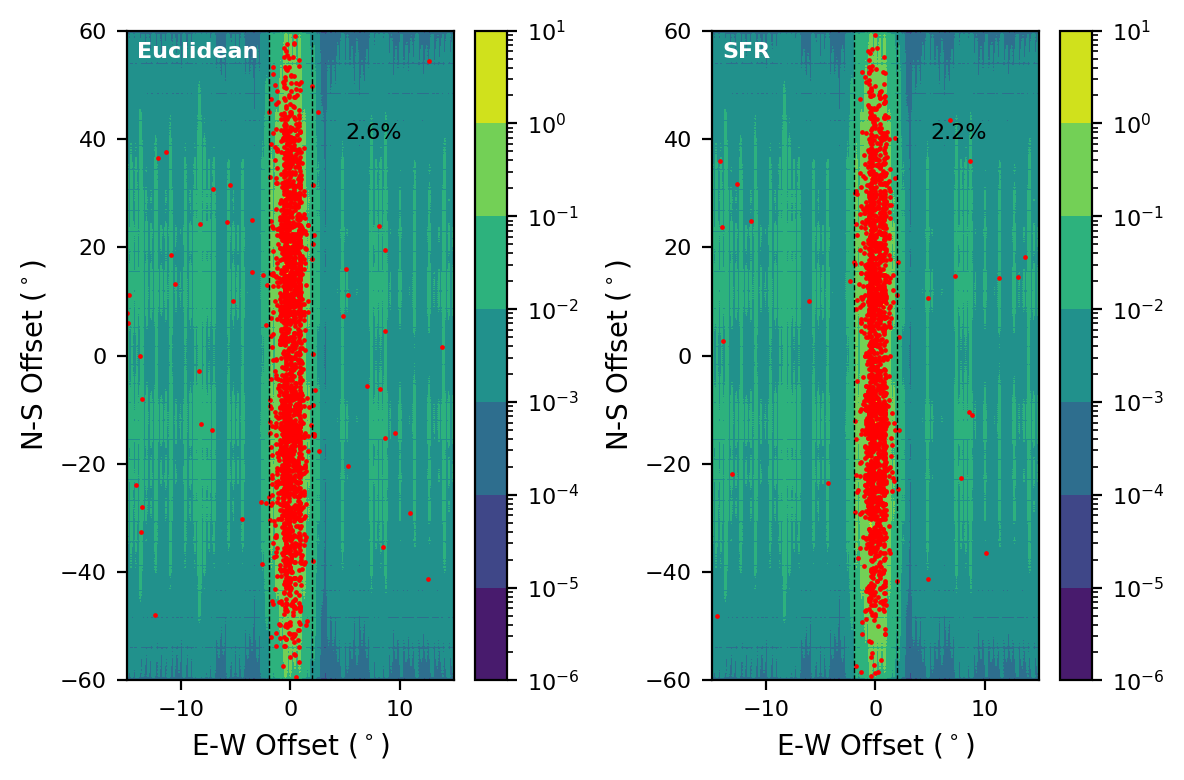

In [6]:
x_range = 15
chime_array_15 = chime_array[:, 800-20*x_range:800+20*x_range]
x_c, y_c = np.linspace(-15, 15, 600), np.linspace(-60, 60, 2400)

fig = plt.figure(dpi=200)

ax1 = plt.subplot2grid((1,2),(0,0), rowspan=2)

#fig1, (ax1, ax2, ax3) = plt.subplots(2, 2)#plt.subplots(2,2)
#ax1.figure(figsize=(6,10))
cs = ax1.contourf(x_c, y_c, chime_array_15, locator=ticker.LogLocator())
plt.scatter(surv_pop.frbs.y_offset, surv_pop.frbs.x_offset, s=0.5, color='r')
plt.axvline(x=-2.0, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(x=2.0, color='black', linestyle='dashed', linewidth=0.5)
plt.xlabel('E-W Offset ($^\circ$)')
plt.ylabel('N-S Offset ($^\circ$)')
plt.xticks(size=8)
plt.yticks(size=8)
plt.text(-14, 55, 'Euclidean', fontfamily='sans-serif', fontweight='bold', fontsize=8, color='white')

mask_primary = (surv_pop.frbs.y_offset <= 2.0) & (surv_pop.frbs.y_offset >= -2.0)
#fraction = len(surv_pop.frbs.y_offset[mask_primary])/len(surv_pop.frbs.z)
fraction=1-0.026
#plt.contourf(x_c, y_c, np.log10(chime_array), levels=20)
#plt.clabel()
plt.text(5, 40, '{:.1%}'.format(1-fraction), size=8)
cbar = fig.colorbar(cs)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_yscale('log')

ax2 = plt.subplot2grid((1,2),(0,1), rowspan=2)

#fig1, (ax1, ax2, ax3) = plt.subplots(2, 2)#plt.subplots(2,2)
#ax1.figure(figsize=(6,10))
cs = ax2.contourf(x_c, y_c, chime_array_15, locator=ticker.LogLocator())
plt.scatter(surv_pop2.frbs.y_offset, surv_pop2.frbs.x_offset, s=0.5, color='r')
plt.axvline(x=-2.0, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(x=2.0, color='black', linestyle='dashed', linewidth=0.5)
plt.xlabel('E-W Offset ($^\circ$)')
plt.ylabel('N-S Offset ($^\circ$)')
plt.xticks(size=8)
plt.yticks(size=8)
plt.text(-14, 55, 'SFR', fontfamily='sans-serif', fontweight='bold', fontsize=8, color='white')

mask_primary = (surv_pop2.frbs.y_offset <= 2.0) & (surv_pop2.frbs.y_offset >= -2.0)
#fraction = len(surv_pop2.frbs.y_offset[mask_primary])/len(surv_pop2.frbs.z)
fraction=1-0.022
#plt.contourf(x_c, y_c, np.log10(chime_array), levels=20)
#plt.clabel()
plt.text(5, 40, '{:.1%}'.format(1-fraction), size=8)
cbar = fig.colorbar(cs, norm=colors.LogNorm(vmin=1e-6,vmax=1))
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_yscale('log')

plt.tight_layout()
#plt.savefig('location.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Sidelobe fraction

In [7]:
np.mean(1-pl_sidelobe_fraction), np.mean(1-sfr_sidelobe_fraction), \
np.mean(1-delay_01gyr_sidelobe_fraction), np.mean(1-delay_05gyr_sidelobe_fraction),\
np.mean(1-delay_1gyr_sidelobe_fraction)

(0.02587793644526274,
 0.0216995394272951,
 0.01796406662163107,
 0.018086482695091693,
 0.018347964500339004)